# **DIGITAL MARKETING CAMPAIGN CONVERSION PREDICTION**

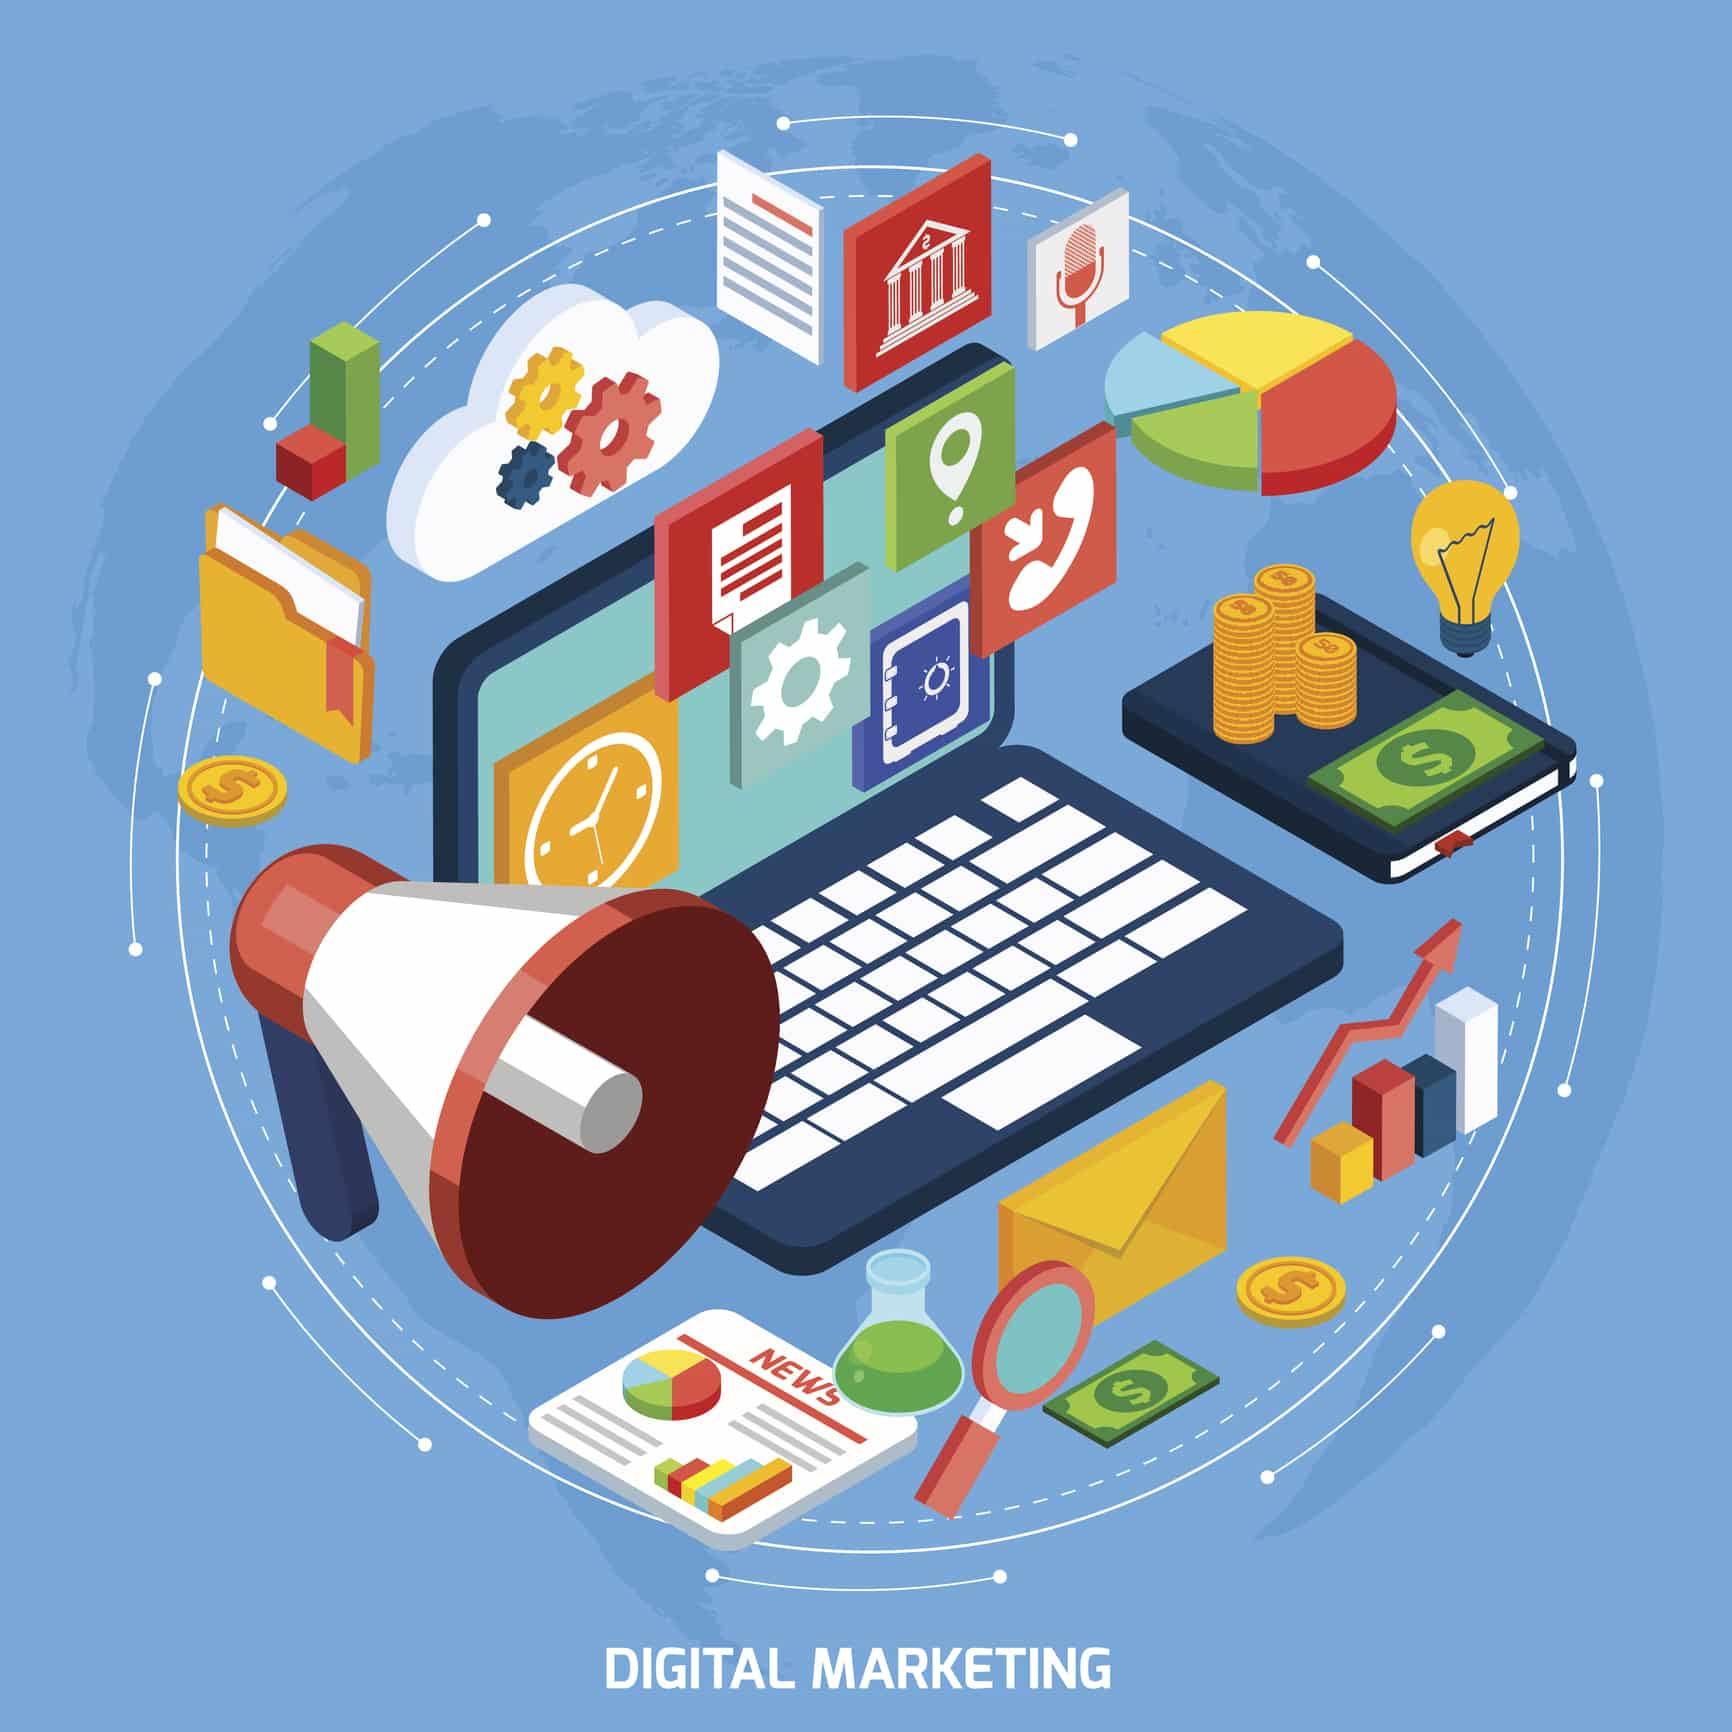

This dataset provides a comprehensive view of customer interactions with digital marketing campaigns. It includes demographic data, marketing-specific metrics, customer engagement indicators, and historical purchase data, making it suitable for predictive modeling and analytics in the digital marketing domain.

Importing neccesary libraries and modules for data preprocessing,EDA, model implementation for performance measures

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from collections import Counter
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [ ]:
df=pd.read_csv('/content/digital_marketing_campaign_dataset.csv')
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0.0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42.0,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2.0,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47.0,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0.0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,NaN,24849,Email,Awareness,8518.308575,0.243792,0.116773,23.0,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49.0,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35.0,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49.0,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


Check for missing values

In [ ]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,21
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,5
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,5


Filling the missing values

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['AdSpend']=df['AdSpend'].fillna(df['AdSpend'].mean())
df['WebsiteVisits']=df['WebsiteVisits'].fillna(df['WebsiteVisits'].mode()[0])

EDA

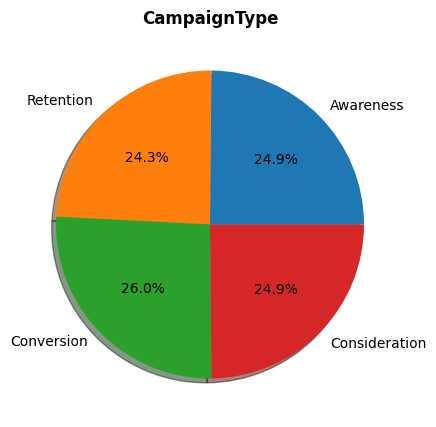

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=Counter(df["CampaignType"]).values(),labels=Counter(df["CampaignType"]).keys(),autopct ="%.1f%%",
        shadow = True)
plt.title("CampaignType",fontsize=12,fontweight="bold")
plt.show()


**Insights:**

*  The campaign types are nearly equally balanced, each around 25%.

* Conversion campaigns have a slightly higher focus at 26%.

* Retention campaigns, even though important, receive the least focus at 24.3%..

* The consistent distribution suggests a well-rounded marketing strategy.






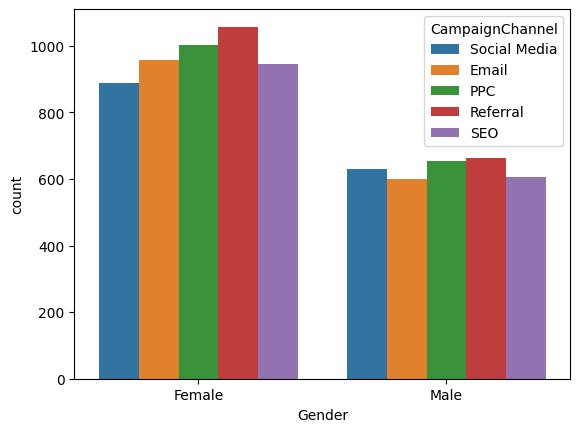

In [ ]:
ax=sns.countplot(x='Gender',data=df,hue='CampaignChannel')


**Insights:**

* Females participate the most in Referral campaigns.
* Males have the least involvement in SEO campaigns.
* Females are more active across all channels than males.
* Males engage almost similar in PPC and Referral campaign



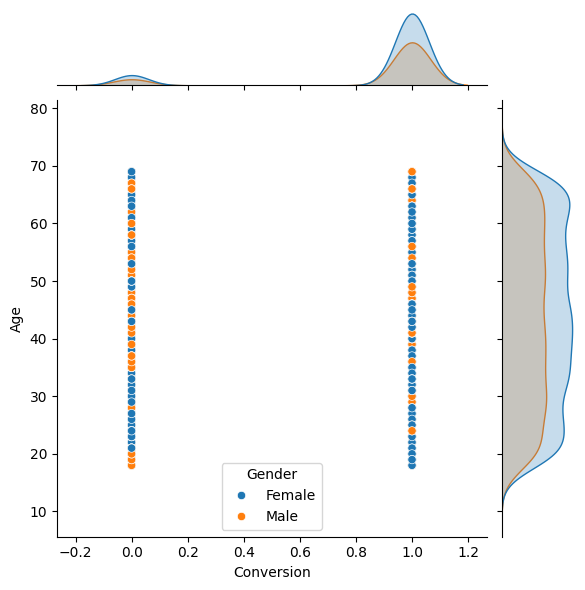

In [ ]:
sns.jointplot(x='Conversion',y='Age',data=df,hue='Gender')

**Insights:**
* Majority of the customers have converted from the Campaign
* Female conversion is much more than male conversion


<Axes: xlabel='Conversion', ylabel='LoyaltyPoints'>

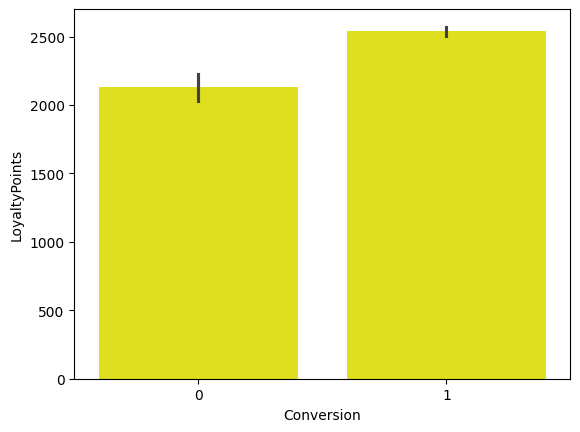

In [ ]:
sns.barplot(x='Conversion',y='LoyaltyPoints',data=df,color='yellow')

**Insights:**
Higher Loyalty Points correlated with higher conversion

Checking the datatypes

In [ ]:
df.dtypes


,0
CustomerID,int64
Age,int64
Gender,object
Income,int64
CampaignChannel,object
CampaignType,object
AdSpend,float64
ClickThroughRate,float64
ConversionRate,float64
WebsiteVisits,float64


Converting to Numeric datatypes

In [ ]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['CampaignChannel']=encoder.fit_transform(df['CampaignChannel'])
df['CampaignType']=encoder.fit_transform(df['CampaignType'])
df['AdvertisingPlatform']=encoder.fit_transform(df['AdvertisingPlatform'])
df['AdvertisingTool']=encoder.fit_transform(df['AdvertisingTool'])


Dropping irrelevant columns

In [ ]:
cols=['CustomerID','AdvertisingPlatform','AdvertisingTool']
for col in cols:
   df.drop([col],axis=1,inplace=True)
df

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,0,136912,4,0,6497.870068,0.043919,0.088031,0.0,2.399017,7.396803,19,6,9,4,688,1
1,69,1,41760,0,3,3898.668606,0.155725,0.182725,42.0,2.917138,5.352549,5,2,7,2,3459,1
2,46,0,88456,1,0,1546.429596,0.277490,0.076423,2.0,8.223619,13.794901,0,11,2,8,2337,1
3,32,0,44085,1,2,539.525936,0.137611,0.088004,47.0,4.540939,14.688363,89,2,2,0,2463,1
4,60,0,83964,1,2,1678.043573,0.252851,0.109940,0.0,2.046847,13.993370,6,6,6,8,4345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,0,24849,0,0,8518.308575,0.243792,0.116773,23.0,9.693602,14.227794,70,13,6,7,286,0
7996,43,0,44718,3,3,1424.613446,0.236740,0.190061,49.0,9.499010,3.501106,52,13,1,5,1502,0
7997,28,0,125471,2,1,4609.534635,0.056526,0.133826,35.0,2.853241,14.618323,38,16,0,3,738,1
7998,19,0,107862,1,1,9476.106354,0.023961,0.138386,49.0,1.002964,3.876623,86,1,5,7,2709,1


Splitting into X and y

In [ ]:
X=df.iloc[:,:-1]
X

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,56,0,136912,4,0,6497.870068,0.043919,0.088031,0.0,2.399017,7.396803,19,6,9,4,688
1,69,1,41760,0,3,3898.668606,0.155725,0.182725,42.0,2.917138,5.352549,5,2,7,2,3459
2,46,0,88456,1,0,1546.429596,0.277490,0.076423,2.0,8.223619,13.794901,0,11,2,8,2337
3,32,0,44085,1,2,539.525936,0.137611,0.088004,47.0,4.540939,14.688363,89,2,2,0,2463
4,60,0,83964,1,2,1678.043573,0.252851,0.109940,0.0,2.046847,13.993370,6,6,6,8,4345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,0,24849,0,0,8518.308575,0.243792,0.116773,23.0,9.693602,14.227794,70,13,6,7,286
7996,43,0,44718,3,3,1424.613446,0.236740,0.190061,49.0,9.499010,3.501106,52,13,1,5,1502
7997,28,0,125471,2,1,4609.534635,0.056526,0.133826,35.0,2.853241,14.618323,38,16,0,3,738
7998,19,0,107862,1,1,9476.106354,0.023961,0.138386,49.0,1.002964,3.876623,86,1,5,7,2709


In [ ]:
y=df.iloc[:,-1]
y

,Conversion
0,1
1,1
2,1
3,1
4,1
...,...
7995,0
7996,0
7997,1
7998,1


Scaling the features

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.74509804, 0.        , 0.8994091 , ..., 1.        , 0.44444444,
        0.13762753],
       [1.        , 1.        , 0.16731296, ..., 0.77777778, 0.22222222,
        0.69193839],
       [0.54901961, 0.        , 0.52659034, ..., 0.22222222, 0.88888889,
        0.4674935 ],
       ...,
       [0.19607843, 0.        , 0.81138245, ..., 0.        , 0.33333333,
        0.14762953],
       [0.01960784, 0.        , 0.67589942, ..., 0.55555556, 0.77777778,
        0.54190838],
       [0.25490196, 0.        , 0.56156711, ..., 1.        , 1.        ,
        0.06821364]])

Splitting into test data and train data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

Building models

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=7)
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()
models=[knn,sv,nb,dt,rf,ab,gb,xg]
for model in models:
   model.fit(X_train,y_train)
   y_pred=model.predict(X_test)
   print("***************",model,"***************")
   print(classification_report(y_test,y_pred))

*************** KNeighborsClassifier() ***************
              precision    recall  f1-score   support

           0       0.41      0.06      0.10       275
           1       0.89      0.99      0.94      2125

    accuracy                           0.88      2400
   macro avg       0.65      0.52      0.52      2400
weighted avg       0.84      0.88      0.84      2400

*************** SVC() ***************
              precision    recall  f1-score   support

           0       0.74      0.13      0.22       275
           1       0.90      0.99      0.94      2125

    accuracy                           0.90      2400
   macro avg       0.82      0.56      0.58      2400
weighted avg       0.88      0.90      0.86      2400

*************** GaussianNB() ***************
              precision    recall  f1-score   support

           0       0.86      0.09      0.16       275
           1       0.89      1.00      0.94      2125

    accuracy                           0.89 

Performing Oversampling  to make dataset balanced

In [ ]:
os=SMOTE(random_state=8)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os_scaled=scaler.fit_transform(X_os)

In [ ]:
y_os.value_counts()

,count
Conversion,
1,7012
0,7012


In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=3)

In [ ]:
acc=[]
for model in models:
   model.fit(X_train_os,y_train_os)
   y_pred_os=model.predict(X_test_os)
   print("***************",model,"***************")
   print(classification_report(y_test_os,y_pred_os))
   acc.append(accuracy_score(y_test_os,y_pred_os)*100)

*************** KNeighborsClassifier() ***************
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      2103
           1       0.94      0.63      0.75      2105

    accuracy                           0.79      4208
   macro avg       0.83      0.79      0.79      4208
weighted avg       0.83      0.79      0.79      4208

*************** SVC() ***************
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2103
           1       0.85      0.83      0.84      2105

    accuracy                           0.84      4208
   macro avg       0.84      0.84      0.84      4208
weighted avg       0.84      0.84      0.84      4208

*************** GaussianNB() ***************
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2103
           1       0.80      0.79      0.80      2105

    accuracy                           0.80 

In [ ]:
X.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints'],
      dtype='object')

Feature Selection: Checking correlation between columns

In [ ]:
df.corr()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
Age,1.000000,-0.010341,0.008731,0.013444,0.028861,-0.004701,0.011542,0.020027,-0.001643,-0.009280,-0.012998,-0.009531,0.015055,0.008820,-0.007123,0.014049,0.001606
Gender,-0.010341,1.000000,-0.039668,0.016038,0.002693,-0.003618,-0.000556,0.006572,0.001854,0.000476,-0.014026,0.003141,-0.016538,0.007324,0.002983,0.005506,0.001575
Income,0.008731,-0.039668,1.000000,0.006295,-0.003600,0.003599,0.008080,0.017552,-0.002867,0.003868,0.019404,-0.006297,-0.001506,0.008541,-0.011924,-0.007181,0.013974
CampaignChannel,0.013444,0.016038,0.006295,1.000000,0.000414,-0.006637,-0.009278,0.006738,0.010519,0.000311,0.003564,0.009901,0.007819,-0.007526,-0.005818,0.012434,-0.004190
CampaignType,0.028861,0.002693,-0.003600,0.000414,1.000000,-0.006548,0.006342,-0.007341,-0.011254,-0.022308,-0.001065,-0.011859,0.008683,0.004273,0.015909,-0.008473,0.030408
AdSpend,-0.004701,-0.003618,0.003599,-0.006637,-0.006548,1.000000,-0.008523,-0.020429,0.007025,-0.009203,-0.004196,-0.021279,0.016459,0.001228,0.002213,0.001723,0.124546
ClickThroughRate,0.011542,-0.000556,0.008080,-0.009278,0.006342,-0.008523,1.000000,-0.008161,-0.022772,0.000088,-0.008210,-0.013287,-0.006076,-0.010825,-0.000387,-0.017314,0.120012
ConversionRate,0.020027,0.006572,0.017552,0.006738,-0.007341,-0.020429,-0.008161,1.000000,-0.012071,0.018789,0.008679,0.008713,0.006449,0.006716,-0.023209,-0.000498,0.093185
WebsiteVisits,-0.001643,0.001854,-0.002867,0.010519,-0.011254,0.007025,-0.022772,-0.012071,1.000000,-0.011167,-0.022534,-0.000639,0.005385,0.003046,0.013785,0.003510,0.079608
PagesPerVisit,-0.009280,0.000476,0.003868,0.000311,-0.022308,-0.009203,0.000088,0.018789,-0.011167,1.000000,0.016455,0.007888,0.000503,-0.000047,-0.016285,-0.012838,0.102840


Dropping less significant columns

In [ ]:
X_os.drop(['Age','Gender'],axis=1,inplace=True)
scaler1=MinMaxScaler()
X_scaled_new=scaler1.fit_transform(X_os)

In [ ]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_scaled_new,y_os,test_size=0.3,random_state=2)

In [ ]:
rf.fit(X_train_new,y_train_new)
y_pred_new=rf.predict(X_test_new)
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2076
           1       0.91      0.88      0.89      2132

    accuracy                           0.90      4208
   macro avg       0.90      0.90      0.90      4208
weighted avg       0.90      0.90      0.90      4208



Hyperparamter Tuning

In [ ]:
params={'n_estimators':[50,100,150],
        'random_state':[1,3,7,9],
        'criterion':['gini','entropy','log_loss']}

In [ ]:
clf=GridSearchCV(rf,params,cv=10,scoring='accuracy')
clf.fit(X_train_new,y_train_new)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 150],
                         'random_state': [1, 3, 7, 9]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 150, 'random_state': 9}

In [ ]:
y_pred1=clf.predict(X_test_new)
print(classification_report(y_test_new,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2076
           1       0.98      0.96      0.97      2132

    accuracy                           0.97      4208
   macro avg       0.97      0.97      0.97      4208
weighted avg       0.97      0.97      0.97      4208



Confusion Matrix Display of the final model

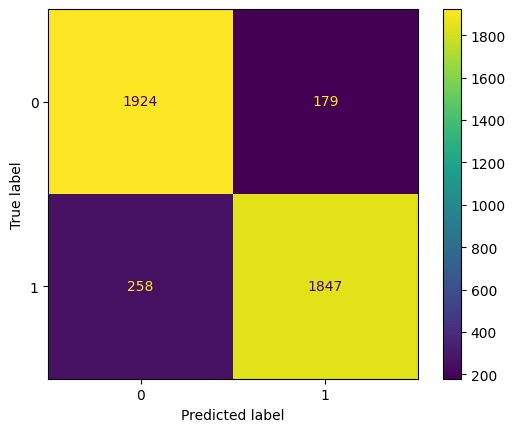

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test_new,y_pred_new))

ROC Curve

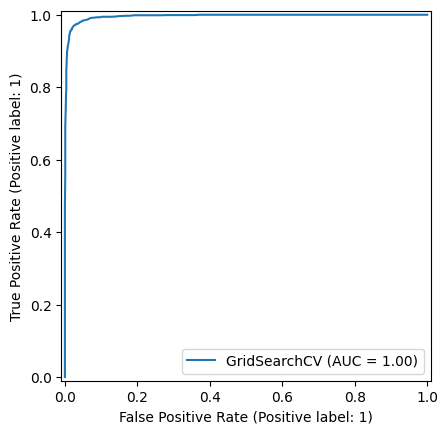

In [ ]:
RocCurveDisplay.from_estimator(clf,X_test_new,y_test_new)

 This is a ROC (Receiver Operating Characteristic) curve with an AUC (Area Under the Curve) score of 1.00, indicating perfect classification by the model.

Saving the model

In [ ]:
import pickle
pickle.dump(clf,open('Digital_marketing1.sav','wb'))
pickle.dump(scaler1,open('DM_scaler1.sav','wb'))